## 시계열 데이터 기본 모델(SMA, WMA, SES, ARIMA)

In [45]:
# 필요한 library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm

In [2]:
# 필요한 csv 파일 불러오기
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [4]:
# airline DataFrame 확인
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Simple Moving Average

In [5]:
# SMA 모델 생성
airline['6M SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()
airline['12M SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

In [7]:
# airline DataFrame 확인
airline.head(10)

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


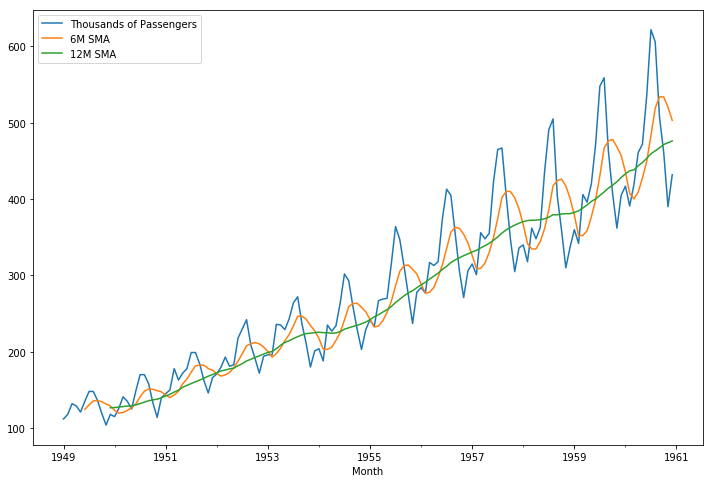

In [8]:
# airline DataFrame plot
airline.plot(figsize = (12, 8))

### Weighted Moving Average

In [12]:
# Weighted Moving Average model plot
airline['WMA12'] = airline['Thousands of Passengers'].ewm(span = 12).mean()
airline['WMA6'] = airline['Thousands of Passengers'].ewm(span = 6).mean()

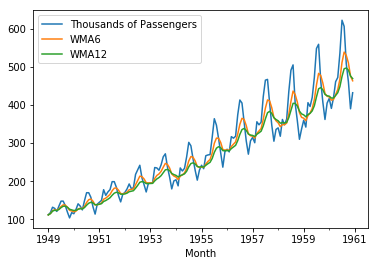

In [14]:
# WMA model plot
airline[['Thousands of Passengers', 'WMA6', 'WMA12']].plot()

### Simple Exponential Smoothing

In [53]:
# train, test set 생성
train = airline[:'1959']
test = airline['1960':]

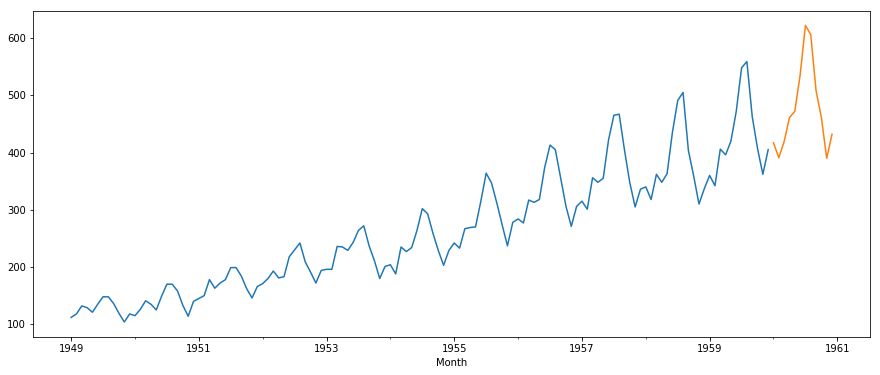

In [54]:
# train, test set plot
train['Thousands of Passengers'].plot(figsize = (15, 6))
test['Thousands of Passengers'].plot()

In [55]:
# Simple Exponential Smoothing model 생성
ses_model = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [19]:
# Simple Exponential Smoothing model fit
ses_result = ses_model.fit()

In [20]:
# test DataFrame copy
y_hat = test.copy()

In [21]:
# Simple Exponential Smoothing model forecast
y_hat['SES'] = ses_result.forecast(len(test))

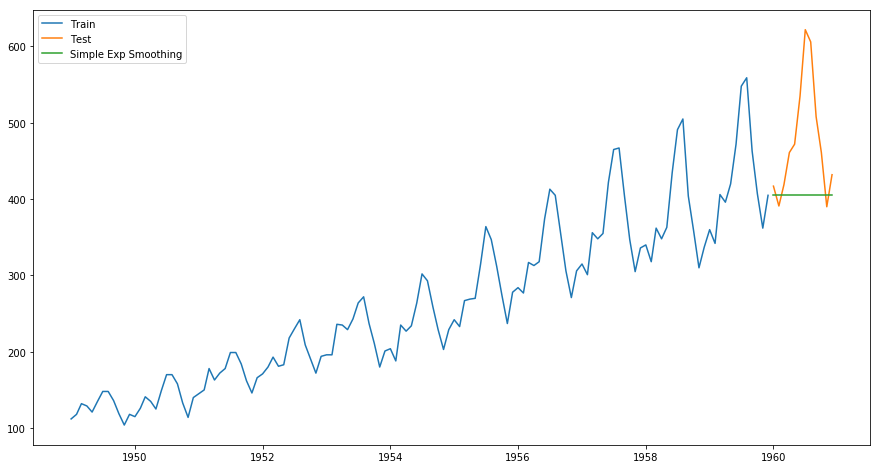

In [24]:
# Simple Exponential Smoothing model plot
plt.figure(figsize = (15, 8))
plt.plot(train['Thousands of Passengers'], label = 'Train')
plt.plot(test['Thousands of Passengers'], label = 'Test')
plt.plot(y_hat['SES'], label = 'Simple Exp Smoothing')
plt.legend()

In [27]:
# Simple Exponential Smoothing model 성능 평가
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['SES']))
rmse

102.97653454387881

### Holt's

In [29]:
# Holt model 생성
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [30]:
# Holt model fit
holt_result = holt_model.fit()

In [32]:
# Holt model forecast
y_hat['HOLT'] = holt_result.forecast(len(test))

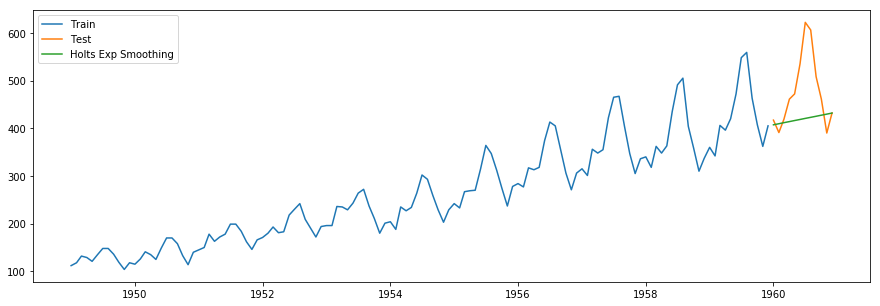

In [34]:
# Holt model plot
plt.figure(figsize = (15, 5))
plt.plot(train['Thousands of Passengers'], label = 'Train')
plt.plot(test['Thousands of Passengers'], label = 'Test')
plt.plot(y_hat['HOLT'], label = 'Holts Exp Smoothing')
plt.legend()

In [35]:
# Holt model 성능 평가
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['HOLT']))
rmse

92.66636321768411

### Holt-Winters

In [38]:
# Holt-Winters model 생성
winter_model = ExponentialSmoothing(np.asarray(train['Thousands of Passengers']), seasonal_periods = 12, trend = 'add', seasonal = 'add')

In [39]:
# Holt-Winters model fit
winter_result = winter_model.fit()

In [40]:
# Holt-Winters model forecast
y_hat['WINTER'] = winter_result.forecast(len(test))

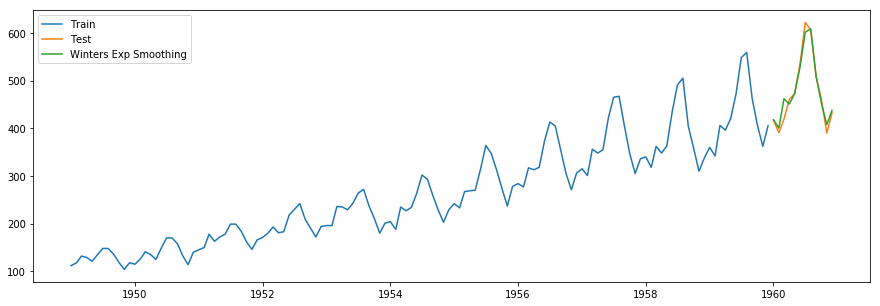

In [50]:
# Holt-Winters model plot
plt.figure(figsize = (15, 5))
plt.plot(train['Thousands of Passengers'], label = 'Train')
plt.plot(test['Thousands of Passengers'], label = 'Test')
plt.plot(y_hat['WINTER'], label = 'Winters Exp Smoothing')
plt.legend()

In [43]:
# Holt-Winters model 성능 평가
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['WINTER']))
rmse

15.570830651640188

### ARIMA

In [46]:
# ARIMA model 생성
arima = sm.tsa.statespace.SARIMAX(train['Thousands of Passengers'], order = (2, 1, 1), seasonal_order = (0, 1, 0, 12), enforce_stationarity=False, enforce_invertibility = False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
# ARIMA model fit
arima_result = arima.fit()

In [49]:
# ARIMA model predict
y_hat['ARIMA'] = arima_result.predict(start = '1960-01-01', end = '1960-12-01', dynamic = True)

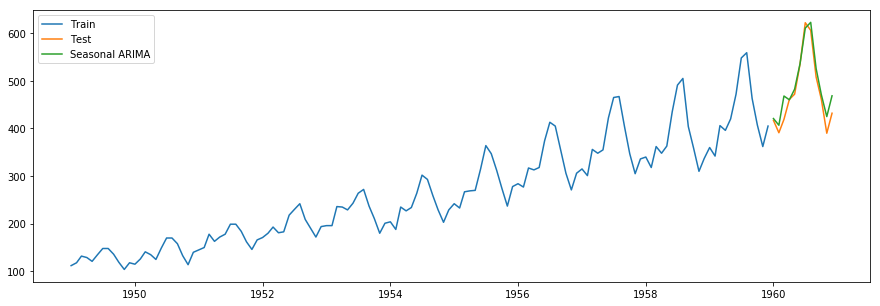

In [51]:
# ARIMA model plot
plt.figure(figsize = (15, 5))
plt.plot(train['Thousands of Passengers'], label = 'Train')
plt.plot(test['Thousands of Passengers'], label = 'Test')
plt.plot(y_hat['ARIMA'], label = 'Seasonal ARIMA')
plt.legend()

In [52]:
# ARIMA model 성능 평가
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['ARIMA']))
rmse

22.650964283693302